## Option Price simulation

In [1]:
import numpy as np;
import math as m
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class option_price:
    """
    A class object for computing the value of European call/put options using the binomial tree method and the Black-Scholes formula. 
    The class is instantiated with some predefined variables of S0 = 98, r = 0.06, σ = 0.1, t = 0 and T = 0.5; The class compute the value based on 
    two methods of computing the upward and downward factors once specify in the tree_methods function for the Binomial tree method. 
    "UDP1" uses the Cox-Ross-Rubenstein method whereas the "UDP2" uses the lognormal formula for 
    the upward and downward factors with each associated probability "p".
    
    """
    
    def __init__(self, E, S0, r, sigma):
        self.E = E
        self.S0 = S0
        self.r = r
        self.sigma = sigma
        
        
        """
        The Binomial tree part
        """
    
    def tree_methods(self, name, T, M):
        dt = T/float(M)
        
        if name == "UDP1":
            u = m.exp(self.sigma*m.sqrt(dt))
            d =  m.exp(-self.sigma*m.sqrt(dt))
            p = (m.exp(self.r*dt)-d)/(u-d)
            
            assetAtExpiry = (self.S0*d**np.arange(M,-1,-1))*(u**np.arange(0,M+1, 1))
        
            optionValue_call = np.maximum(assetAtExpiry-self.E, 0)
        
            for i in range(int(M)-1,-1,-1):
            
                optionValue_call = m.exp(-self.r*dt)*(p*optionValue_call[range(1, i+2)] + (1-p)*optionValue_call[range(0,i+1)])
    
            return optionValue_call[0]
            
        
        elif name == "UDP2":
            
            u = m.exp(self.sigma*m.sqrt(dt) + (self.r-(self.sigma**2)/2)*dt)
            d = m.exp(-self.sigma*m.sqrt(dt) + (self.r-(self.sigma**2)/2)*dt)
            p = 0.5
            
            assetAtExpiry = (self.S0*d**np.arange(M,-1,-1))*(u**np.arange(0,M+1, 1))
        
            optionValue_call = np.maximum(assetAtExpiry-self.E, 0)
        
            for i in range(int(M)-1,-1,-1):
            
                optionValue_call = m.exp(-self.r*dt)*(p*optionValue_call[range(1, i+2)] + (1-p)*optionValue_call[range(0,i+1)])
    
            return optionValue_call[0]
    
    
        """
        The Black-Scholes formula
        """
          
        
    def dees(self):  ### method for computing d1 and d2
        dt = 0.5
        d1 = (m.log(self.S0/self.E)+(self.r+(self.sigma**2)/2)*(dt))/(self.sigma*(m.sqrt(dt)))
        d2 = (m.log(self.S0/self.E)+(self.r-(self.sigma**2)/2)*(dt))/(self.sigma*(m.sqrt(dt)))
        return d1, d2

    def N(self, x):  ## computing N(x)
        return 0.5*(1+m.erf(x/m.sqrt(2)))
    
    ## Black-Scholes European Call option function
    def call_option(self, T, t):
        dt = T-t
        d1, d2 = self.dees()
        return (self.S0*self.N(d1))-(self.E*(m.exp(-self.r*dt))*self.N(d2))
    
    ## Black-Scholes European put option function
    def put_option(self, T, t):
        dt = T-t
        d1, d2 = self.dees()
        return (self.E*m.exp(-self.r*dt))*self.N(-d2)-(self.S0*self.N(-d1))
 
        
        
### instantiating the class object with the following parameters
options = option_price(100, 98, 0.06, 0.1)

### Error for Cox-Ross-Rubenstein method 

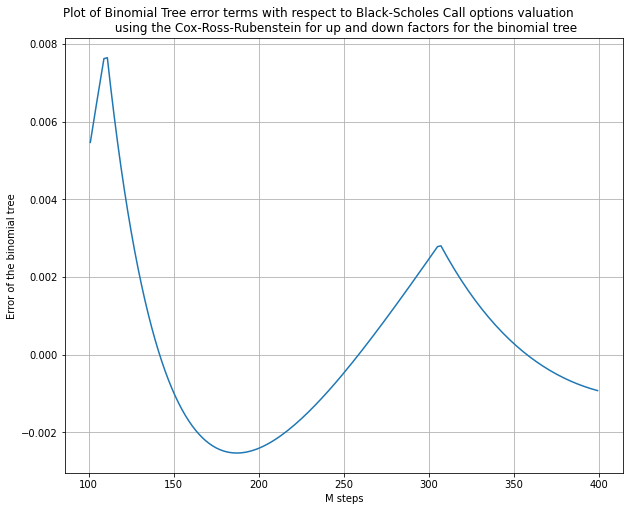

In [4]:
e_M = [] ### for error values 
M = [] ## for the respective M steps
for step in range(101,400, 2):
    Cb_S = options.call_option(0.5,0)
    Cb_T = options.tree_methods('UDP1', 0.5, step)
    e_M.append(Cb_S-Cb_T)
    M.append(step)

plt.figure(figsize = (10,8))
plt.plot(M, e_M)
plt.title("Plot of Binomial Tree error terms with respect to Black-Scholes Call options valuation \
            \n using the Cox-Ross-Rubenstein for up and down factors for the binomial tree")
plt.xlabel('M steps')
plt.ylabel('Error of the binomial tree')
plt.grid()
plt.show()

- The error line shows a decreasing nature as the value of M increases. Though there is up and down movements of the error value it does not exceeed the previous highest error value and hence shows a decreasing or diminishing value with increase in the number of steps.

### Error for Lognormal upward and downward factor method 

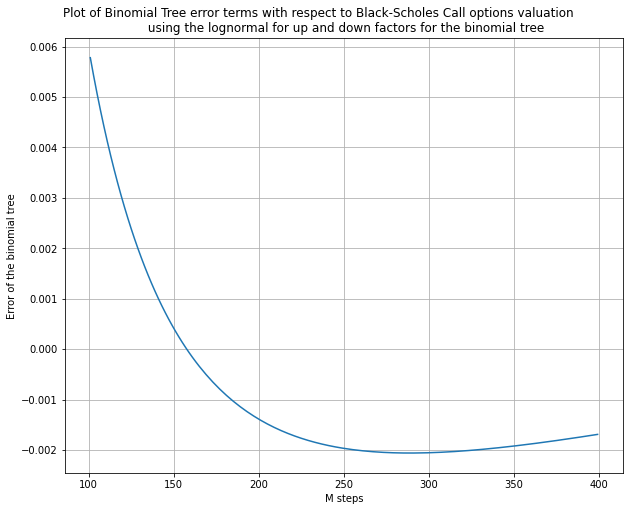

In [6]:
e_M_ = [] ### for error values 
M_ = [] ## for the respective M steps
for step in range(101,400, 2):
    Cb_S = options.call_option(0.5,0)
    Cb_T = options.tree_methods('UDP2', 0.5, step)
    e_M_.append(Cb_S-Cb_T)
    M_.append(step)

plt.figure(figsize = (10,8))
plt.plot(M_, e_M_)
plt.title("Plot of Binomial Tree error terms with respect to Black-Scholes Call options valuation \
            \n using the lognormal for up and down factors for the binomial tree")
plt.xlabel('M steps')
plt.ylabel('Error of the binomial tree')
plt.grid()
plt.show()

- The error line shows a decreasing nature as the value of M increases. Compared with the Cox-Ross-Reberstein method for upward and downward factor the lognormal method produces a smooth decrease till 330 steps until a small rise in error. 